In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load dataset
df = pd.read_csv(r'/EV_Dataset.csv')

In [4]:
# Selecting relevant columns (keeping numerical and categorical features for clustering)
numeric_features = ['Year', 'EV_Sales_Quantity']
categorical_features = ['State', 'Vehicle_Class', 'Vehicle_Category', 'Vehicle_Type']


In [5]:
# Encode categorical features using Label Encoding
label_encoders = {}
for col in categorical_features:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store encoders for later use


In [6]:
# Select only necessary features for clustering
clustering_features = numeric_features + categorical_features
data = df[clustering_features]

In [7]:
# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [9]:
# Finding optimal number of clusters using Elbow Method
inertia = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)


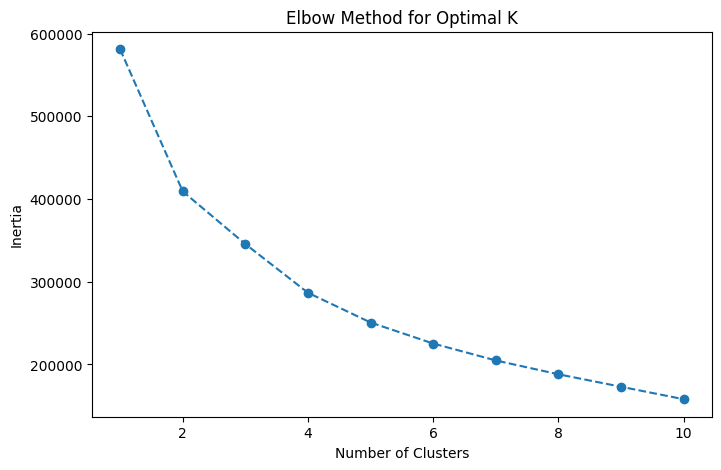

In [10]:
# Plot Elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

In [11]:

# Apply K-Means with optimal K (choose based on elbow curve, e.g., k=4)
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(data_scaled)

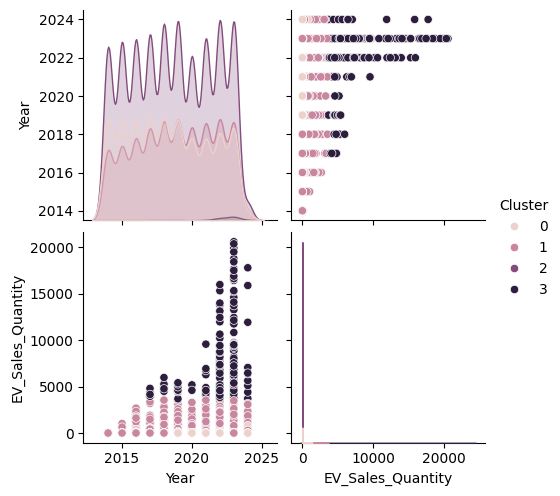

In [12]:
# Visualizing clusters
sns.pairplot(df, hue='Cluster', vars=['Year', 'EV_Sales_Quantity'])
plt.show()


In [15]:
# Save the clustered dataset
df.to_csv("D:\feynn intern\EV_Dataset_Clustered.csv", index=False)
print("Clustering completed. File saved as EV_Dataset_Clustered.csv")

Clustering completed. File saved as EV_Dataset_Clustered.csv


In [18]:
from google.colab import files

# Save the clustered dataset
file_path = "EV_Dataset_Clustered.csv"
df.to_csv(file_path, index=False)

# Download the file
files.download("D:\feynn intern\EV_Dataset_Clustered.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>